Yiting Wang 4646909520

(a)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np, pandas as pd 
data = pd.read_table('../data/banknote_authentication.txt', sep=',', header = None)

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, train_size = 900)

#Construct X_test, y_test
X_test = test_data.iloc[:, :4]
y_test = test_data.iloc[:, 4]

b(i)

In [4]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, KFold

L1_SVM = LinearSVC(penalty = 'l1', dual = False)
C_range = np.logspace(-1, 4, 8)
L1_params = {'C':C_range}
L1_grid = GridSearchCV(L1_SVM, L1_params, cv = KFold(5))

In [5]:
MonteCarlo_passive = {}
     
for t in range(50):
    passive_test_error = []
    train_data, test_data = train_test_split(data, train_size = 900)
    X_train = y_train = X_add = y_add = pd.DataFrame()
    
    for i in range(90):
        
        if len(train_data) > 10:
            add_data, _ = train_test_split(train_data, train_size = 10)
        else:
            add_data = train_data
        
        X_add = add_data.iloc[:, :4]
        y_add = add_data.iloc[:, 4]
        
        #Remove add_data from train_data and add data to X_train
        train_data = train_data.drop(index = add_data.index)
        
        X_add = add_data.iloc[:, :4]
        y_add = add_data.iloc[:, 4]
        X_train = pd.concat([X_train, X_add])
        y_train = pd.concat([y_train, y_add])

        #Construct the model
        L1_SVM = L1_grid.fit(X_train, y_train)
        test_error = 1 - L1_SVM.score(X_test, y_test)
        passive_test_error.append(test_error)
    
    MonteCarlo_passive[t] = passive_test_error

In [17]:
#Times and SVM_model
times, SVM_model, passive_learning = [], [], []

for t in range(50):
    for i in range(1,91):
        times.append(int(t + 1))
        SVM_model.append('SVM Model ' + str(i))
        
    passive_test_error = MonteCarlo_passive[t]
    for j in passive_test_error:
        passive_learning.append(j)

Times = pd.DataFrame(times, columns = ['Times'])
SVM_model  = pd.DataFrame(SVM_model, columns = ['SVM Model'])
Passive_test_error = pd.DataFrame(passive_learning, columns = ['Test Error'])

table = pd.concat([Times, SVM_model, Passive_test_error], axis = 1)
print('Passive Learning')
print(table)

Passive Learning
      Times     SVM Model  Test Error
0         1   SVM Model 1    0.186441
1         1   SVM Model 2    0.110169
2         1   SVM Model 3    0.029661
3         1   SVM Model 4    0.029661
4         1   SVM Model 5    0.029661
5         1   SVM Model 6    0.021186
6         1   SVM Model 7    0.021186
7         1   SVM Model 8    0.021186
8         1   SVM Model 9    0.019068
9         1  SVM Model 10    0.023305
10        1  SVM Model 11    0.010593
11        1  SVM Model 12    0.014831
12        1  SVM Model 13    0.014831
13        1  SVM Model 14    0.016949
14        1  SVM Model 15    0.016949
15        1  SVM Model 16    0.016949
16        1  SVM Model 17    0.016949
17        1  SVM Model 18    0.016949
18        1  SVM Model 19    0.016949
19        1  SVM Model 20    0.016949
20        1  SVM Model 21    0.016949
21        1  SVM Model 22    0.016949
22        1  SVM Model 23    0.016949
23        1  SVM Model 24    0.016949
24        1  SVM Model 25    0.01

b(ii)

In [10]:
MonteCarlo_active = {}
     
for t in range(50):
    active_learning_error = []
    train_data, test_data = train_test_split(data, train_size = 900)
    pool_data, _ = train_test_split(train_data, train_size = 10)
    X_pool = pool_data.iloc[:, :4]
    y_pool = pool_data.iloc[:, 4]
    
    L1_SVM = L1_grid.fit(X_pool, y_pool)
    test_error = 1 - L1_SVM.score(X_test, y_test)
    active_learning_error.append(test_error)
    
    for i in range(89):
        X_train = train_data.iloc[:, :4]
        y_train = train_data.iloc[:, 4]
        
        #Calculate distance from unlabeled data points to decision boundary
        distances = L1_SVM.decision_function(X_train)

        #Sort by the absolute value of score
        sorted_index = sorted([i for i in range(len(X_train))], key = lambda x : abs(distances[x]), reverse = False)
        closest_point = sorted_index[0:10]
        closest_X = pd.DataFrame(X_train.iloc[closest_point,:])
        closest_y = pd.Series(y_train.iloc[closest_point])
        
        #Remove the closest point from unlabeled and add it to labeled
        train_data = train_data.drop(index = closest_X.index)
        X_pool = pd.concat([X_pool, closest_X])
        y_pool = pd.concat([y_pool, closest_y])
        
        #Refit the SVC
        L1_SVM = L1_grid.fit(X_pool, y_pool)
        test_error = 1 - L1_SVM.score(X_test, y_test)
        active_learning_error.append(test_error)
        
    MonteCarlo_active[t] =  active_learning_error

In [18]:
#Times and SVM_model
times, SVM_model, active_learning = [], [], []

for t in range(50):
    for i in range(1,91):
        times.append(int(t + 1))
        SVM_model.append('SVM Model ' + str(i))
        
    active_test_error = MonteCarlo_active[t]
    for j in passive_test_error:
        active_learning.append(j)

Times = pd.DataFrame(times, columns = ['Times'])
SVM_model  = pd.DataFrame(SVM_model, columns = ['SVM Model'])
Active_test_error = pd.DataFrame(active_learning, columns = ['Test Error'])

table = pd.concat([Times, SVM_model, Active_test_error], axis = 1)
print('Active Learning')
print(table)

Active Learning
      Times     SVM Model  Test Error
0         1   SVM Model 1    0.362288
1         1   SVM Model 2    0.019068
2         1   SVM Model 3    0.010593
3         1   SVM Model 4    0.063559
4         1   SVM Model 5    0.063559
5         1   SVM Model 6    0.063559
6         1   SVM Model 7    0.014831
7         1   SVM Model 8    0.014831
8         1   SVM Model 9    0.014831
9         1  SVM Model 10    0.012712
10        1  SVM Model 11    0.012712
11        1  SVM Model 12    0.012712
12        1  SVM Model 13    0.016949
13        1  SVM Model 14    0.036017
14        1  SVM Model 15    0.036017
15        1  SVM Model 16    0.008475
16        1  SVM Model 17    0.002119
17        1  SVM Model 18    0.006356
18        1  SVM Model 19    0.006356
19        1  SVM Model 20    0.006356
20        1  SVM Model 21    0.006356
21        1  SVM Model 22    0.006356
22        1  SVM Model 23    0.006356
23        1  SVM Model 24    0.006356
24        1  SVM Model 25    0.006

(c)

In [13]:
#Construct average test error of passive learning in 90 SVM models
passive_error = []
MonteCarlo_passive_learning = pd.DataFrame(MonteCarlo_passive)
for idx in MonteCarlo_passive_learning.index:
    passive_error.append(np.mean(MonteCarlo_passive_learning.iloc[idx]))

In [14]:
#Construct average test error of active learning in 90 SVM models
active_error = []
MonteCarlo_active_learning = pd.DataFrame(MonteCarlo_active)
for idx in MonteCarlo_active_learning.index:
    active_error.append(np.mean(MonteCarlo_active_learning.iloc[idx]))

In [15]:
SVM_model = []

for i in range(1, 91):
    SVM_model.append('SVM Model ' + str(i))

SVM_model  = pd.DataFrame(SVM_model, columns = ['SVM Model'])
Passive_error = pd.DataFrame(passive_error, columns = ['Passive Error'])
Active_error = pd.DataFrame(active_error, columns = ['Active Error'])

table = pd.concat([SVM_model, Passive_error, Active_error], axis = 1)
print(table)

       SVM Model  Passive Error  Active Error
0    SVM Model 1       0.135678      0.121864
1    SVM Model 2       0.064619      0.051441
2    SVM Model 3       0.043983      0.029958
3    SVM Model 4       0.037076      0.022331
4    SVM Model 5       0.026229      0.015000
5    SVM Model 6       0.020678      0.009364
6    SVM Model 7       0.018305      0.009492
7    SVM Model 8       0.015042      0.009195
8    SVM Model 9       0.013941      0.010000
9   SVM Model 10       0.014068      0.009364
10  SVM Model 11       0.013559      0.009831
11  SVM Model 12       0.012458      0.009364
12  SVM Model 13       0.012373      0.009195
13  SVM Model 14       0.012203      0.009068
14  SVM Model 15       0.011653      0.008729
15  SVM Model 16       0.010932      0.008898
16  SVM Model 17       0.010890      0.008771
17  SVM Model 18       0.010593      0.008814
18  SVM Model 19       0.010339      0.008602
19  SVM Model 20       0.010254      0.008602
20  SVM Model 21       0.009661   

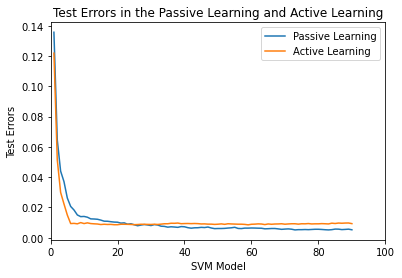

In [16]:
#Plot test errors in the passive learning and active learning                  
k = [i for i in range(1,91)] 

import matplotlib.pyplot as plt 
plt.xlim(0, 100)
plt.plot(k, Passive_error, label = 'Passive Learning')
plt.plot(k, Active_error, label = 'Active Learning')
plt.xlabel('SVM Model')
plt.ylabel('Test Errors') 
plt.title('Test Errors in the Passive Learning and Active Learning')
plt.legend()

As the number of training instances increase, the test errors of passive learning and active learning decrease rapidly.